In [1]:
# RUN THESE CELLS TO START THE PROJECT!
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../DATA/Telco-Customer-Churn.csv')

In [4]:
df

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7027  6840-RESVB    Male              0     Yes        Yes      24   
7028  2234-XADUH  Female              0     Yes        Yes      72   
7029  4801-JZAZL  Female              0     Yes        Yes      11   
7030  8361-LTMKD    Male              1     Yes         No       4   
7031  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1             Yes                No             DSL            Yes  ...   
2             Yes                No             DSL            Yes  ...   
3              No  No phone service             DSL            Yes  ...   
4             Yes                No     Fiber optic             No  ...   
...           ...               ...             ...            ...  ...   
7027          Yes               Yes             DSL            Yes  ...   
7028          Yes               Yes     Fiber optic             No  ...   
7029           No  No phone service             DSL            Yes  ...   
7030          Yes               Yes     Fiber optic             No  ...   
7031          Yes                No     Fiber optic            Yes  ...   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                  No          No          No              No  Month-to-month   
1                 Yes          No          No              No        One year   
2                  No          No          No              No  Month-to-month   
3                 Yes         Yes          No              No        One year   
4                  No          No          No              No  Month-to-month   
...               ...         ...         ...             ...             ...   
7027              Yes         Yes         Yes             Yes        One year   
7028              Yes          No         Yes             Yes        One year   
7029               No          No          No              No  Month-to-month   
7030               No          No          No              No  Month-to-month   
7031              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
0                 Yes           Electronic check          29.85         29.85   
1                  No               Mailed check          56.95       1889.50   
2                 Yes               Mailed check          53.85        108.15   
3                  No  Bank transfer (automatic)          42.30       1840.75   
4                 Yes           Electronic check          70.70        151.65   
...               ...                        ...            ...           ...   
7027              Yes               Mailed check          84.80       1990.50   
7028              Yes    Credit card (automatic)         103.20       7362.90   
7029              Yes           Electronic check          29.60        346.45   
7030              Yes               Mailed check          74.40        306.60   
7031              Yes  Bank transfer (automatic)         105.65       6844.50   

      Churn  
0        No  
1        No  
2       Yes  
3        No  
4       Yes  
...     ...  
7027     No  
7028     No  
7029     No  
7030    Yes  
7031     No  

[7032 rows x 21 columns]

In [5]:
# Quick Data Check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [6]:
df.describe()

SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7032.000000  7032.000000     7032.000000   7032.000000
mean        0.162400    32.421786       64.798208   2283.300441
std         0.368844    24.545260       30.085974   2266.771362
min         0.000000     1.000000       18.250000     18.800000
25%         0.000000     9.000000       35.587500    401.450000
50%         0.000000    29.000000       70.350000   1397.475000
75%         0.000000    55.000000       89.862500   3794.737500
max         1.000000    72.000000      118.750000   8684.800000

In [7]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<Axes: xlabel='Churn', ylabel='count'>

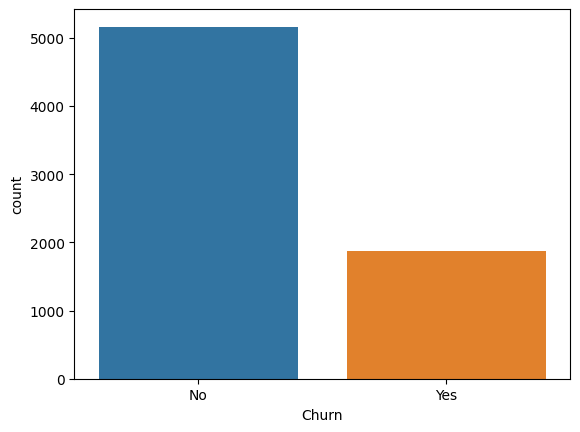

In [8]:
sns.countplot(data=df,x='Churn')

<Axes: xlabel='Churn', ylabel='TotalCharges'>

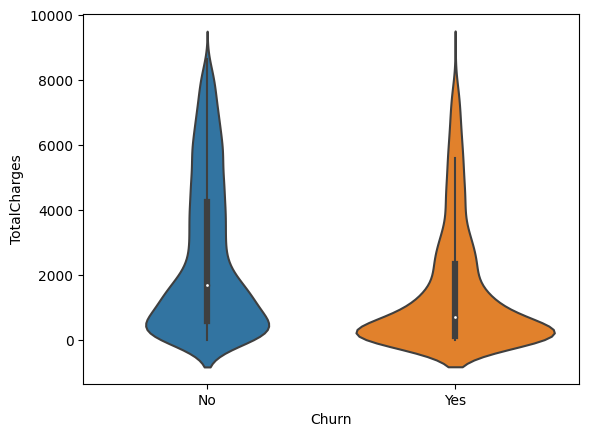

In [9]:
sns.violinplot(data=df,x='Churn',y='TotalCharges')

In [10]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [11]:
corr_df  = pd.get_dummies(df[['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod','Churn']]).corr()

In [12]:
corr_df

SeniorCitizen  gender_Female  \
SeniorCitizen                                 1.000000       0.001819   
gender_Female                                 0.001819       1.000000   
gender_Male                                  -0.001819      -1.000000   
Partner_No                                   -0.016957      -0.001379   
Partner_Yes                                   0.016957       0.001379   
Dependents_No                                 0.210550       0.010349   
Dependents_Yes                               -0.210550      -0.010349   
PhoneService_No                              -0.008392      -0.007515   
PhoneService_Yes                              0.008392       0.007515   
MultipleLines_No                             -0.136377      -0.004335   
MultipleLines_No phone service               -0.008392      -0.007515   
MultipleLines_Yes                             0.142996       0.008883   
InternetService_DSL                          -0.108276      -0.007584   
InternetService_Fiber optic                   0.254923       0.011189   
InternetService_No                           -0.182519      -0.004745   
OnlineSecurity_No                             0.185145      -0.010859   
OnlineSecurity_No internet service           -0.182519      -0.004745   
OnlineSecurity_Yes                           -0.038576       0.016328   
OnlineBackup_No                               0.087539      -0.008605   
OnlineBackup_No internet service             -0.182519      -0.004745   
OnlineBackup_Yes                              0.066663       0.013093   
DeviceProtection_No                           0.094403       0.003163   
DeviceProtection_No internet service         -0.182519      -0.004745   
DeviceProtection_Yes                          0.059514       0.000807   
TechSupport_No                                0.205254      -0.003815   
TechSupport_No internet service              -0.182519      -0.004745   
TechSupport_Yes                              -0.060577       0.008507   
StreamingTV_No                                0.048664      -0.003088   
StreamingTV_No internet service              -0.182519      -0.004745   
StreamingTV_Yes                               0.105445       0.007124   
StreamingMovies_No                            0.034196      -0.006078   
StreamingMovies_No internet service          -0.182519      -0.004745   
StreamingMovies_Yes                           0.119842       0.010105   
Contract_Month-to-month                       0.137752       0.003251   
Contract_One year                            -0.046491      -0.007755   
Contract_Two year                            -0.116205       0.003603   
PaperlessBilling_No                          -0.156258      -0.011902   
PaperlessBilling_Yes                          0.156258       0.011902   
PaymentMethod_Bank transfer (automatic)      -0.016235       0.015973   
PaymentMethod_Credit card (automatic)        -0.024359      -0.001632   
PaymentMethod_Electronic check                0.171322      -0.000844   
PaymentMethod_Mailed check                   -0.152987      -0.013199   
Churn_No                                     -0.150541      -0.008545   
Churn_Yes                                     0.150541       0.008545   

                                         gender_Male  Partner_No  Partner_Yes  \
SeniorCitizen                              -0.001819   -0.016957     0.016957   
gender_Female                              -1.000000   -0.001379     0.001379   
gender_Male                                 1.000000    0.001379    -0.001379   
Partner_No                                  0.001379    1.000000    -1.000000   
Partner_Yes                                -0.001379   -1.000000     1.000000   
Dependents_No                              -0.010349    0.452269    -0.452269   
Dependents_Yes                              0.010349   -0.452269     0.452269   
PhoneService_No                             0.007515    0.018397    -0.018397   
PhoneService_Yes          

In [13]:
corr_df['Churn_Yes'].sort_values().iloc[1:-1]

Contract_Two year                         -0.301552
StreamingMovies_No internet service       -0.227578
StreamingTV_No internet service           -0.227578
TechSupport_No internet service           -0.227578
DeviceProtection_No internet service      -0.227578
OnlineBackup_No internet service          -0.227578
OnlineSecurity_No internet service        -0.227578
InternetService_No                        -0.227578
PaperlessBilling_No                       -0.191454
Contract_One year                         -0.178225
OnlineSecurity_Yes                        -0.171270
TechSupport_Yes                           -0.164716
Dependents_Yes                            -0.163128
Partner_Yes                               -0.149982
PaymentMethod_Credit card (automatic)     -0.134687
InternetService_DSL                       -0.124141
PaymentMethod_Bank transfer (automatic)   -0.118136
PaymentMethod_Mailed check                -0.090773
OnlineBackup_Yes                          -0.082307
DeviceProtec

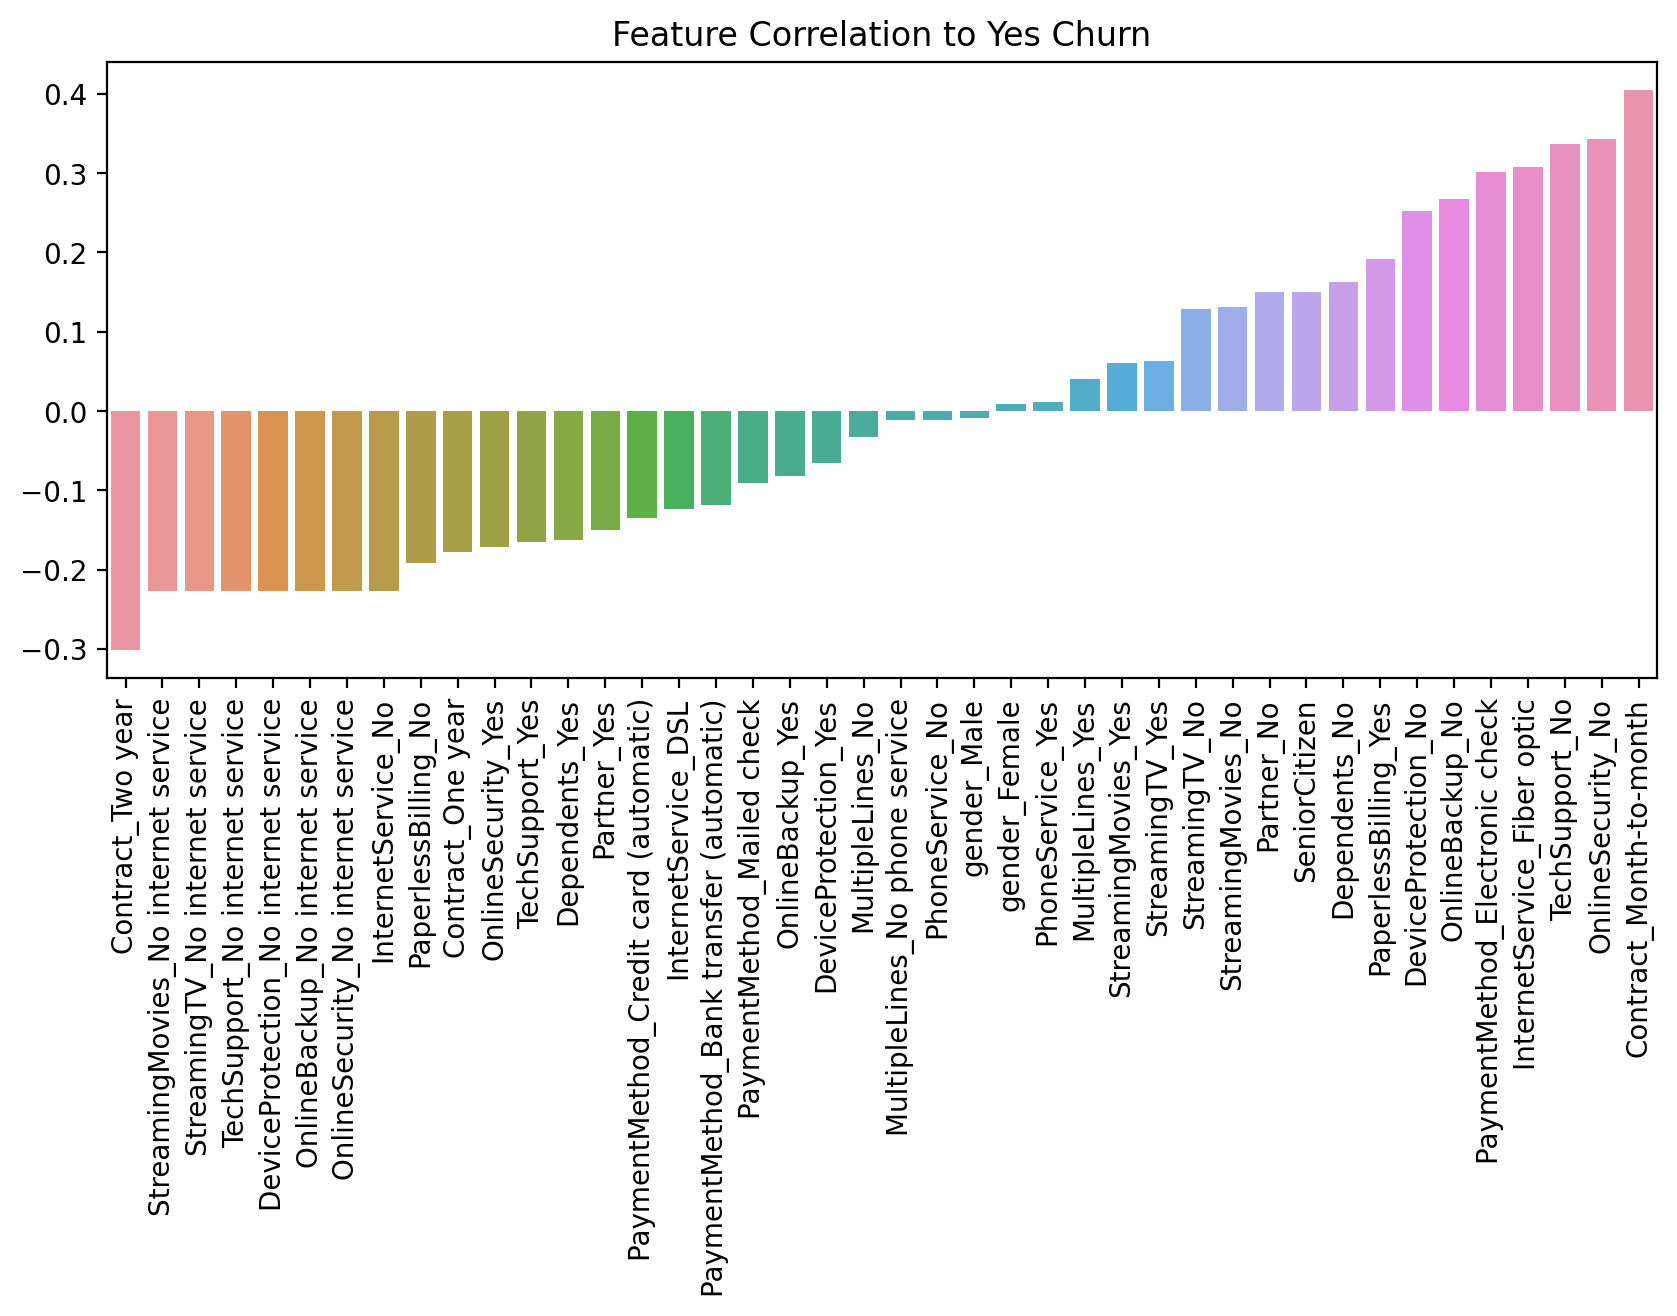

In [14]:
plt.figure(figsize=(10,4),dpi=200)
sns.barplot(x=corr_df['Churn_Yes'].sort_values().iloc[1:-1].index,y=corr_df['Churn_Yes'].sort_values().iloc[1:-1].values)
plt.title("Feature Correlation to Yes Churn")
plt.xticks(rotation=90);

In [15]:
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

<Axes: xlabel='tenure', ylabel='Count'>

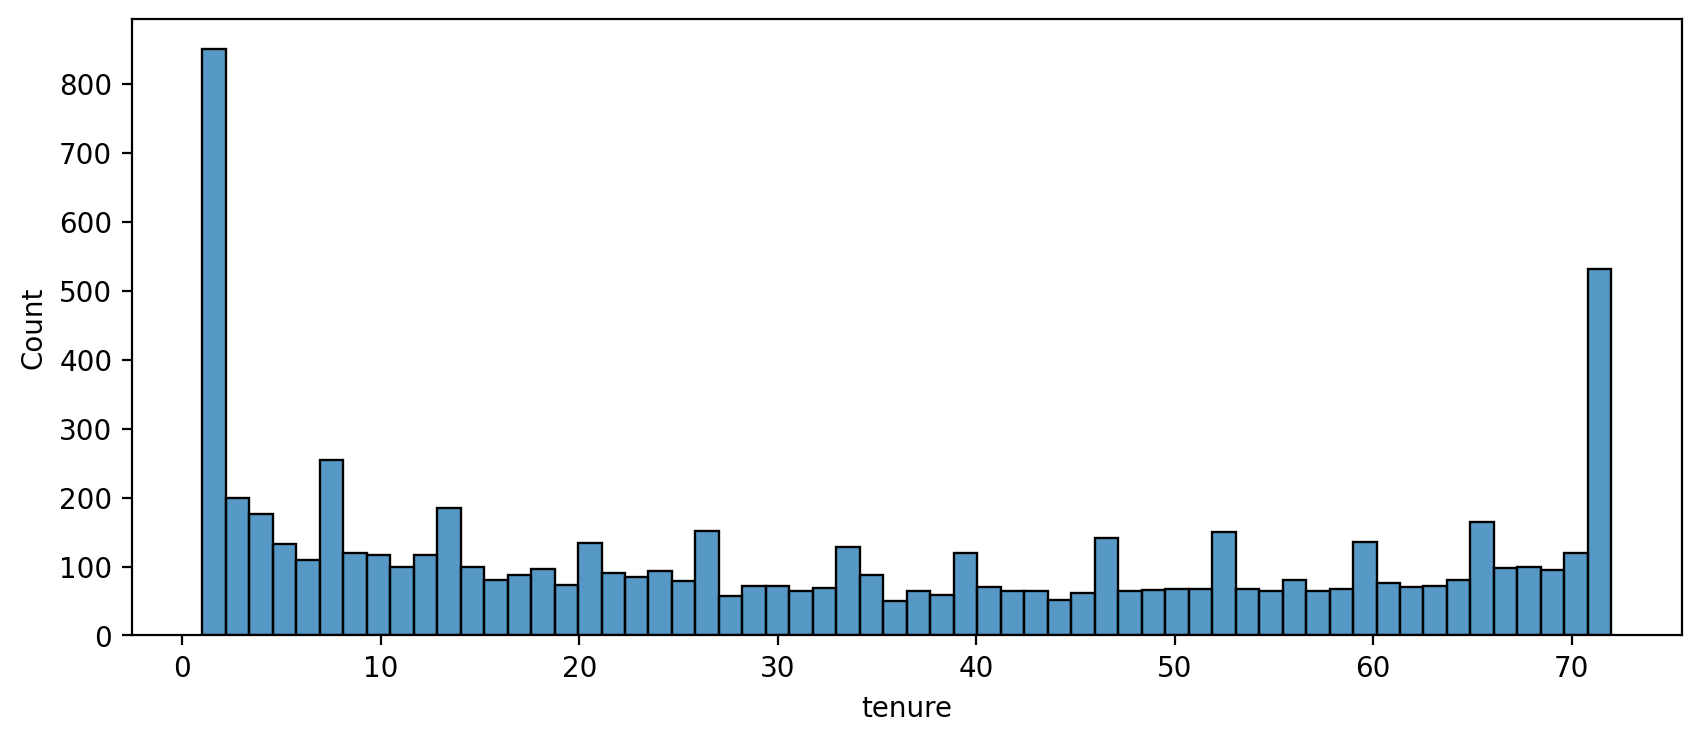

In [16]:
plt.figure(figsize=(10,4),dpi=200)
sns.histplot(data=df,x='tenure',bins=60)

<Figure size 2000x600 with 0 Axes>

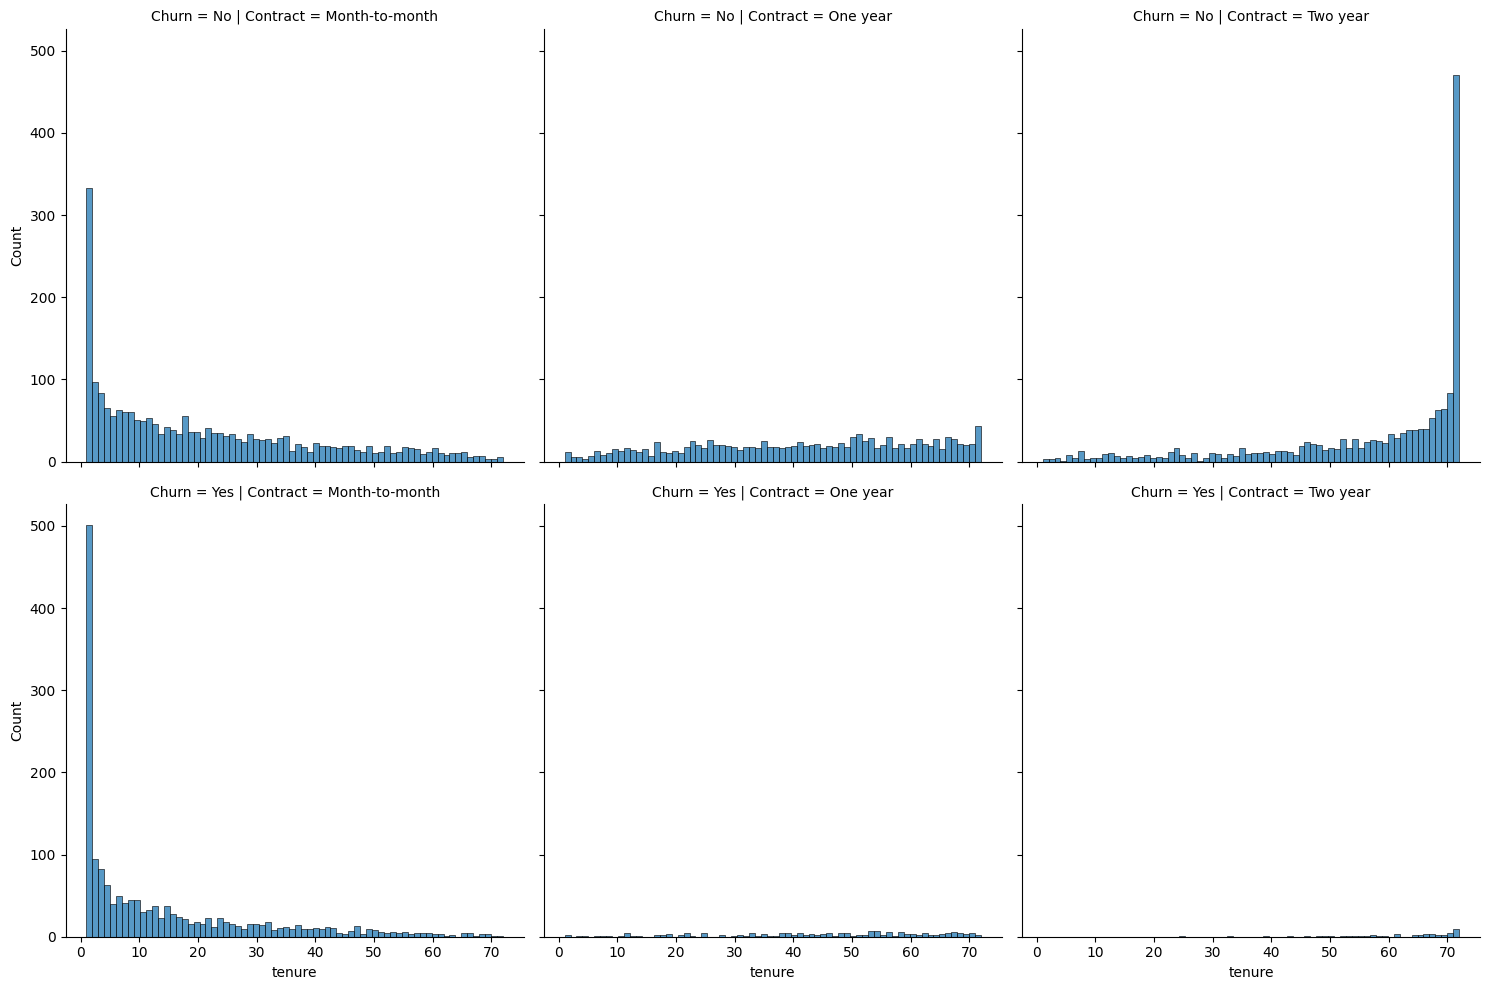

In [17]:
plt.figure(figsize=(10,3),dpi=200)
sns.displot(data=df,x='tenure',bins=70,col='Contract',row='Churn');

In [18]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

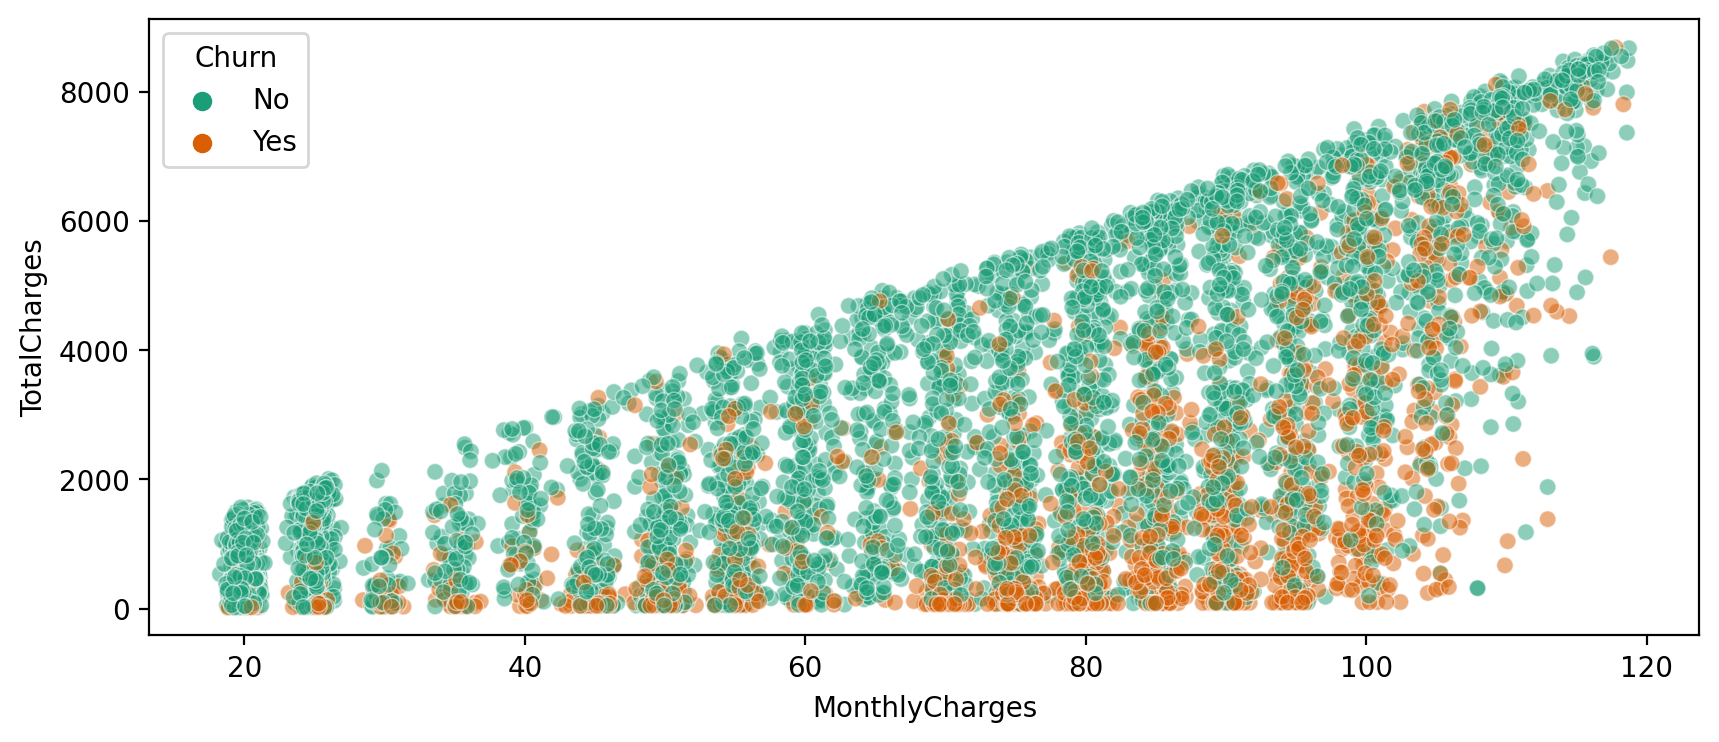

In [19]:
plt.figure(figsize=(10,4),dpi=200)
sns.scatterplot(data=df,x='MonthlyCharges',y='TotalCharges',hue='Churn', linewidth=0.5,alpha=0.5,palette='Dark2')

In [20]:
no_churn = df.groupby(['Churn','tenure']).count().transpose()['No']
yes_churn = df.groupby(['Churn','tenure']).count().transpose()['Yes']

In [21]:
churn_rate = 100 * yes_churn / (no_churn+yes_churn)

In [22]:
churn_rate.transpose()['customerID']

tenure
1     61.990212
2     51.680672
3     47.000000
4     47.159091
5     48.120301
        ...    
68     9.000000
69     8.421053
70     9.243697
71     3.529412
72     1.657459
Name: customerID, Length: 72, dtype: float64

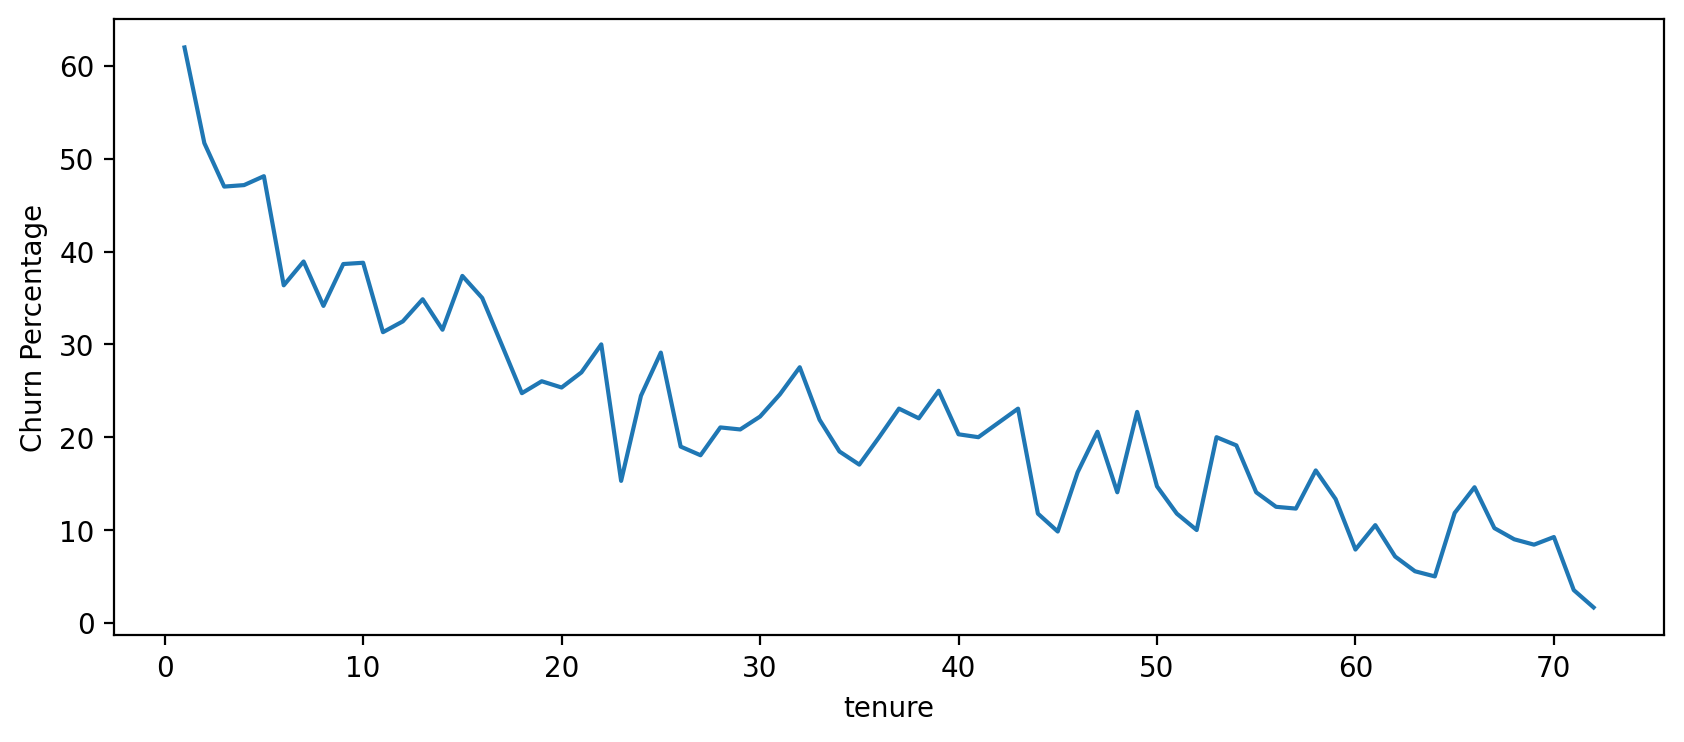

In [23]:
plt.figure(figsize=(10,4),dpi=200)
churn_rate.iloc[0].plot()
plt.ylabel('Churn Percentage');

In [24]:
## Decision tree
X = df.drop(['Churn','customerID'],axis=1)
X = pd.get_dummies(X,drop_first=True)

In [25]:
y = df['Churn']

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [27]:
from sklearn.tree import DecisionTreeClassifier

In [28]:
dt = DecisionTreeClassifier(max_depth=6)

In [29]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6)

In [30]:
preds = dt.predict(X_test)

In [35]:
from sklearn.metrics import accuracy_score,classification_report, ConfusionMatrixDisplay

In [36]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

          No       0.87      0.89      0.88       557
         Yes       0.55      0.49      0.52       147

    accuracy                           0.81       704
   macro avg       0.71      0.69      0.70       704
weighted avg       0.80      0.81      0.80       704



In [40]:
ConfusionMatrixDisplay(dt,display_labels=None)

In [41]:
imp_feats = pd.DataFrame(data=dt.feature_importances_,index=X.columns,columns=['Feature Importance']).sort_values("Feature Importance")

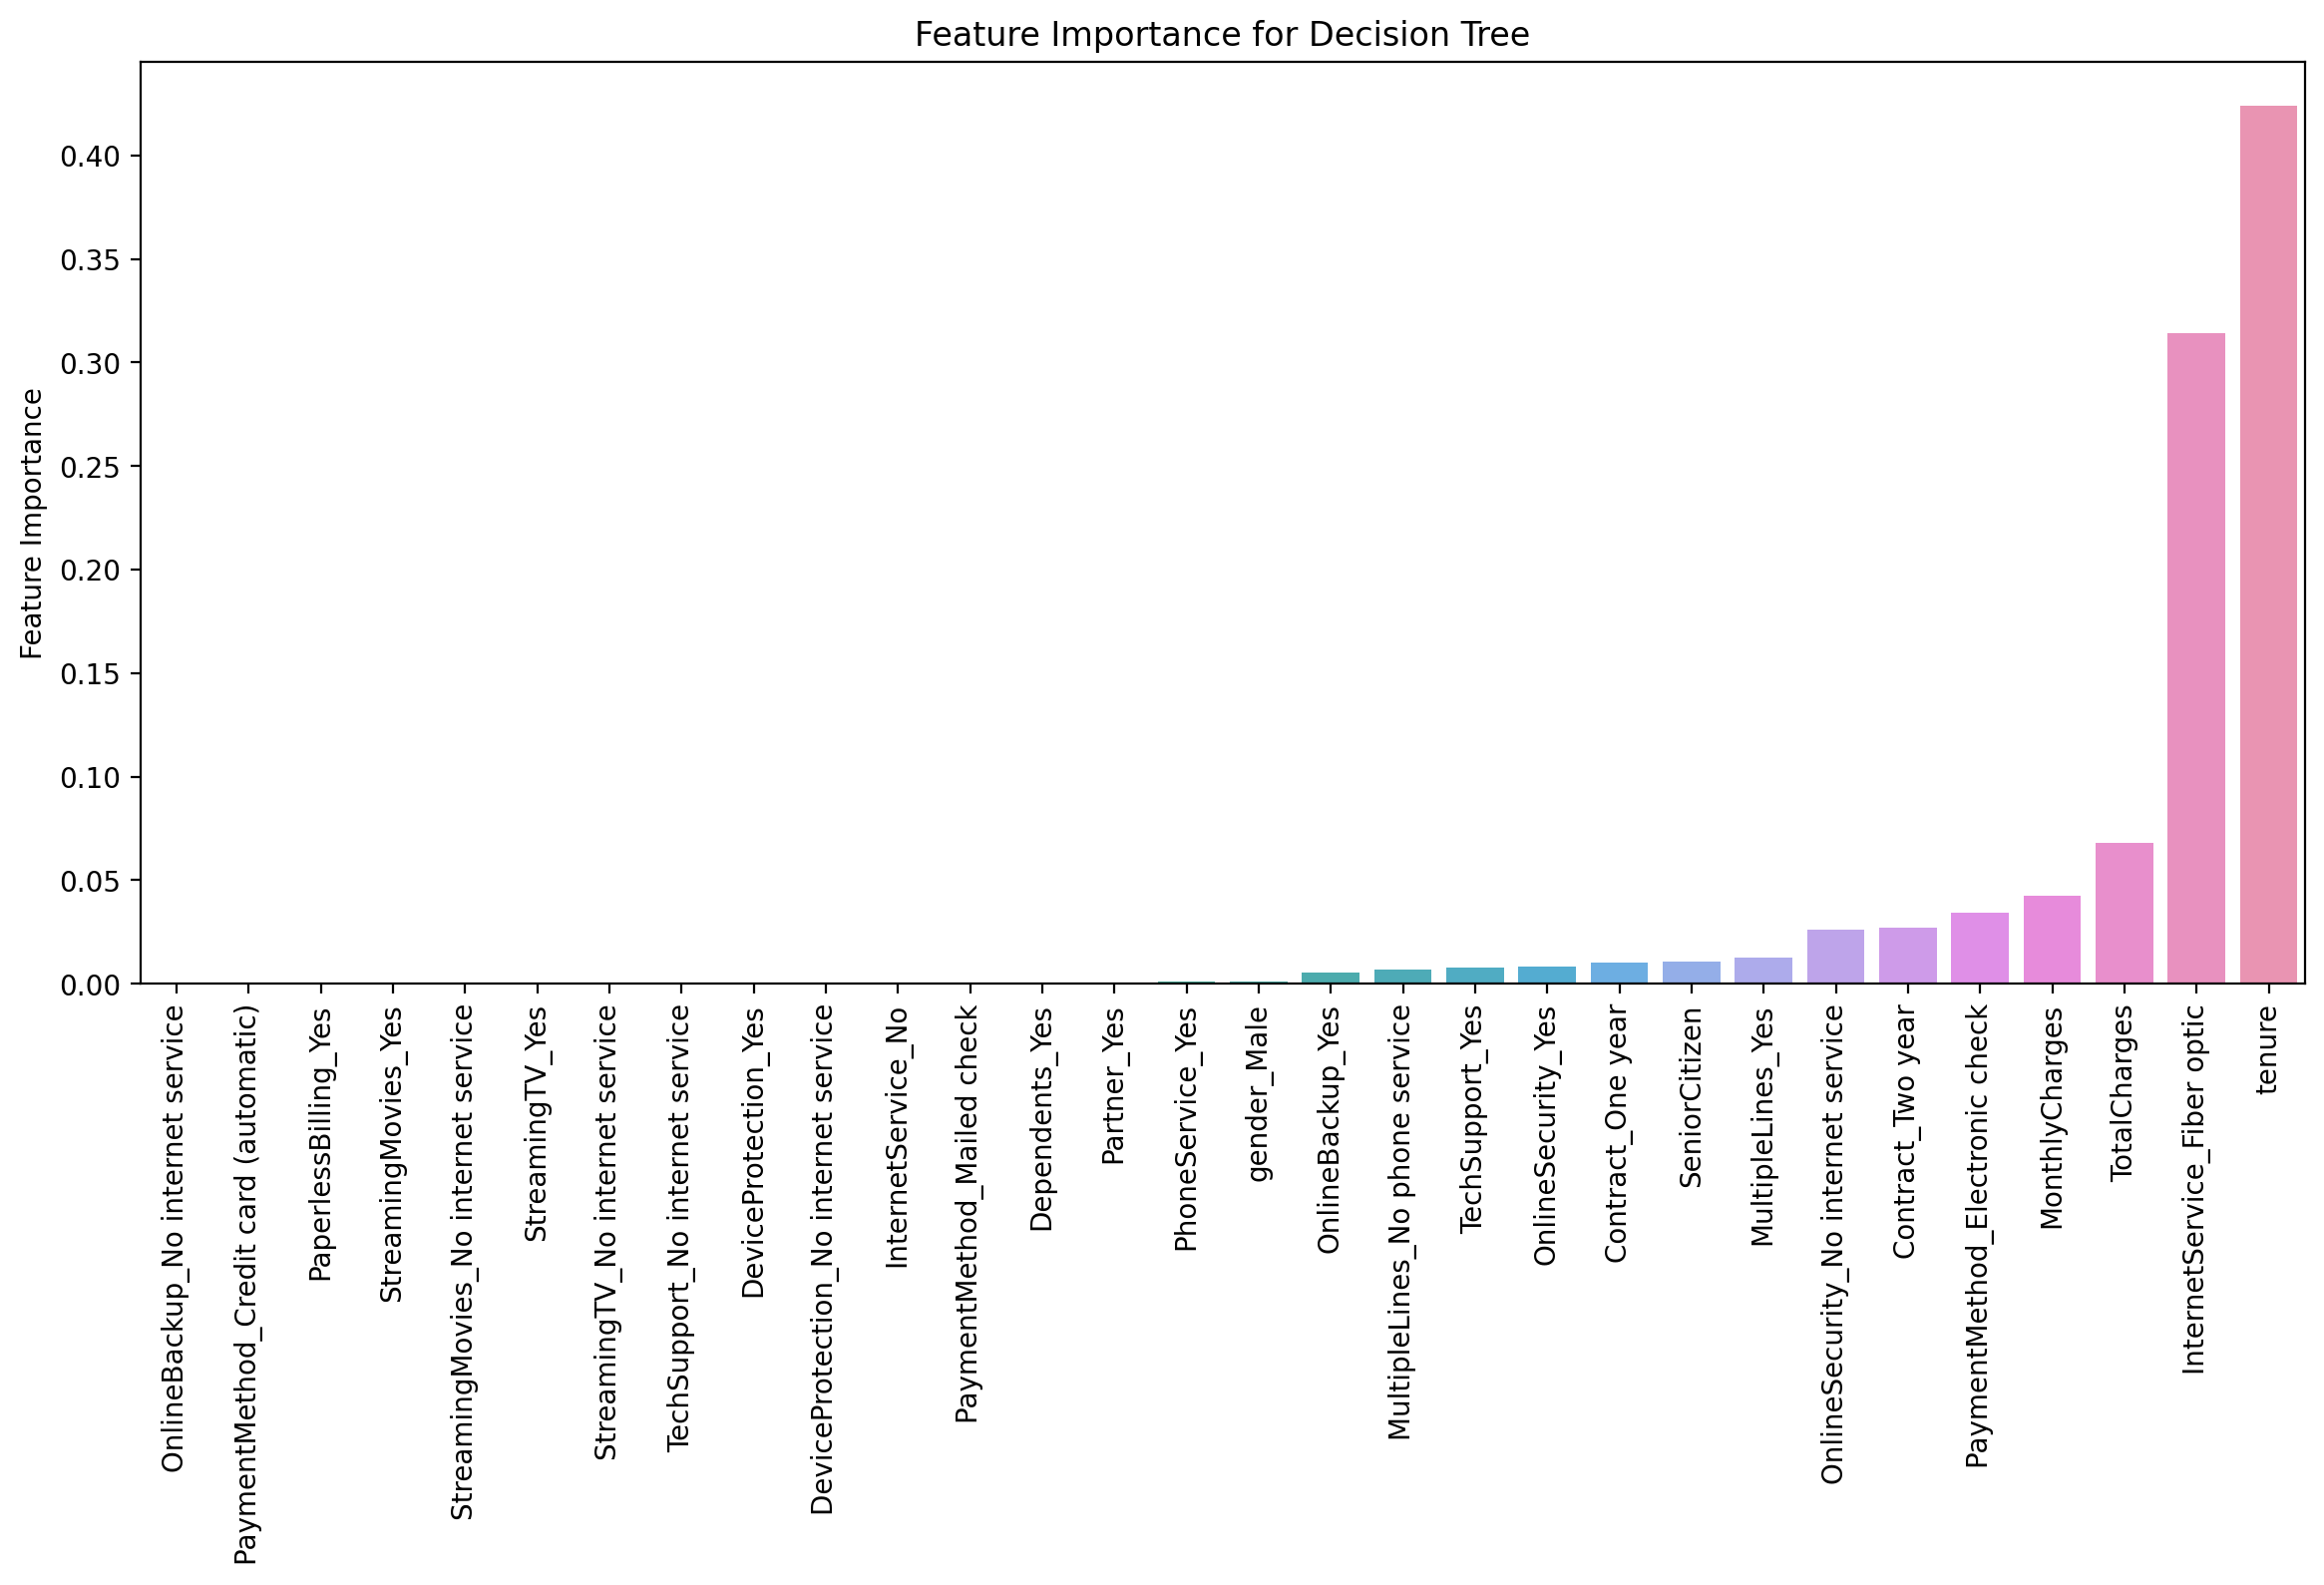

In [42]:
plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data=imp_feats.sort_values('Feature Importance'),x=imp_feats.sort_values('Feature Importance').index,y='Feature Importance')
plt.xticks(rotation=90)
plt.title("Feature Importance for Decision Tree");

In [43]:
from sklearn.tree import plot_tree

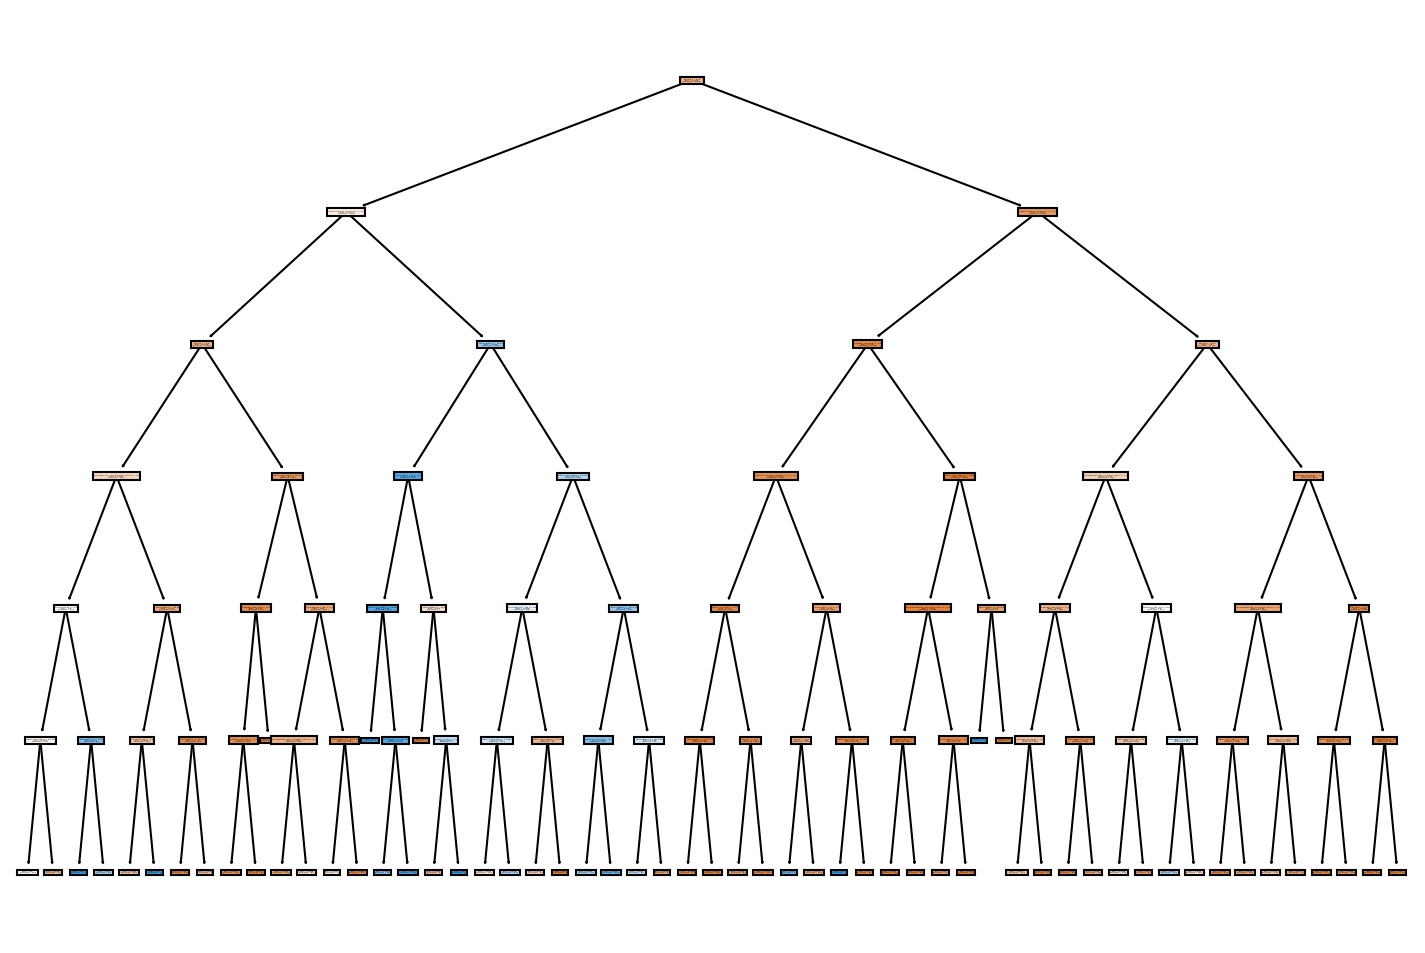

In [44]:
plt.figure(figsize=(12,8),dpi=150)
plot_tree(dt,filled=True,feature_names=X.columns);

In [46]:
# Random forest
from sklearn.ensemble import RandomForestClassifier

In [47]:
rf = RandomForestClassifier(n_estimators=100)

In [48]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [49]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [50]:
preds = rf.predict(X_test)

In [51]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

          No       0.86      0.89      0.87       557
         Yes       0.52      0.46      0.49       147

    accuracy                           0.80       704
   macro avg       0.69      0.67      0.68       704
weighted avg       0.79      0.80      0.79       704



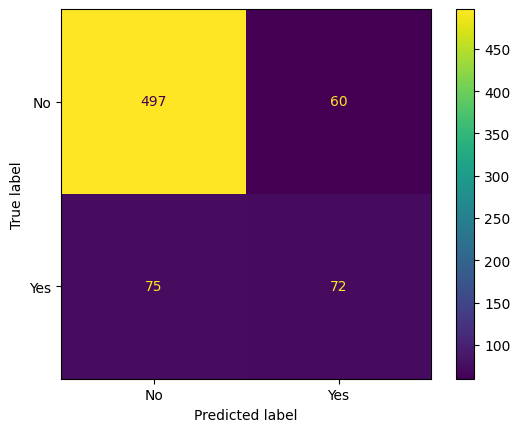

In [53]:
ConfusionMatrixDisplay.from_estimator(dt, X_test, y_test)

In [54]:
# Boosted Tree
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier

In [56]:
ada_model = AdaBoostClassifier()

ada_model.fit(X_train,y_train)

AdaBoostClassifier()

In [57]:
preds = ada_model.predict(X_test)

print(classification_report(y_test,preds))

              precision    recall  f1-score   support

          No       0.88      0.90      0.89       557
         Yes       0.60      0.54      0.57       147

    accuracy                           0.83       704
   macro avg       0.74      0.72      0.73       704
weighted avg       0.82      0.83      0.83       704



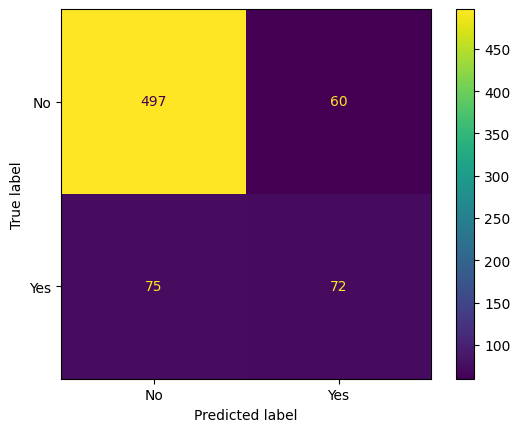

In [58]:
ConfusionMatrixDisplay.from_estimator(dt, X_test, y_test)